In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats
import richdem as rd

In [ ]:
import elevation
import rasterio
# clip the SRTM1 30m DEM of Rome and save it to Rome-DEM.tif
elevation.clip(bounds=(77.8, 30.6, 77.9, 30.7), output='/home/jovyan/work/data/utt.tif')
# clean up stale temporary files and fix the cache in the event of a server error
elevation.clean()

In [ ]:
import os
os.getcwd()

In [19]:
src = rasterio.open('/home/jovyan/work/data/utt.tif')

In [18]:
line = gpd.read_file('chakrata-kalsi.shp')

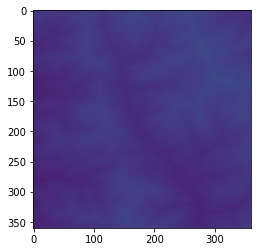

In [15]:
array = tif.read(1)

plt.imshow(array, vmin=0, vmax=10000)
plt.show()

In [20]:
rast_stats = zonal_stats(line['geometry'][0], 
            src.read(1), affine=src.transform,
            stats="count min mean max median")
rast_stats[0]['mean']

/opt/conda/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


1167.0882352941176

In [33]:
dem_path = '/home/jovyan/work/data/output.tif'

In [32]:
!gdalwarp -t_srs EPSG:32644 /home/jovyan/work/data/utt.tif /home/jovyan/work/data/output.tif

Creating output file that is 344P x 394L.
Processing /home/jovyan/work/data/utt.tif [1/1] : 0Using internal nodata values (e.g. -32768) for image /home/jovyan/work/data/utt.tif.
Copying nodata values from source /home/jovyan/work/data/utt.tif to destination /home/jovyan/work/data/output.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


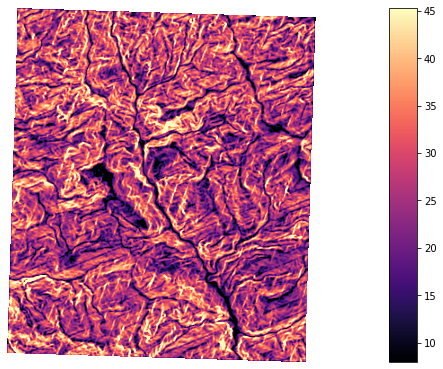

In [34]:
#slope
#dem_path = "n30_e078_1arc_v3.tif"
dem = rd.LoadGDAL(dem_path)
slope = rd.TerrainAttribute(dem, attrib='slope_degrees')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

In [28]:
dem.crs

AttributeError: 'rdarray' object has no attribute 'crs'

In [29]:
src.crs

CRS.from_epsg(4326)

In [30]:
src = rasterio.open(dem_path)

In [31]:
src.crs

CRS.from_epsg(4326)